 **Predicting Temperatures during the World War 2 bombings **





This project has been taken from kaggle which is about the prediction of the Weather during the World War 2 aerial bombings. The bombings were postponed on the D-day due to bad weather conditions. This project makes use of Simple Linear Regression concept in order to predict the temperatures.
Datasets for this project can be downloaded from [Kaggle.](https://www.kaggle.com/smid80/weatherww2)

**Importing Libraries which will be needed for this project**

In [ ]:
import pandas.util.testing as tm
#Data manipulation
import pandas as pd
import io #using this to import files onto Google colab
import numpy as np  
import os #Not required here but if there is need to access system's files, this command helps us perform this task
import matplotlib.pyplot as plt  #Tool used for plotting 
import seaborn as seabornInstance #Tool used for visualization
from sklearn.model_selection import train_test_split #Required for splitting dataset into train and test data
from sklearn.linear_model import LinearRegression #Making use of Linear Regression Model
from sklearn import metrics #Required for calculation of MAE, MSE and RMSE
#Used to print the plots in this screen itself 
%matplotlib inline

**Importing file into Google Colab**

In [ ]:
from google.colab import files 
uploaded = files.upload()

**Reading File uploaded above**

In [ ]:
dataset= pd.read_csv(io.BytesIO(uploaded['Summary of Weather.csv'])) 
print(dataset)

**Exploring the data uploaded**

In [ ]:
#Prints the number of rows and columns
dataset.shape

(119040, 31)

In [ ]:
#Describes the table in terms of Mean, Max, min, 25% and so on
dataset.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,MAX,MIN,MEA,SND,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,118566.000000,118572.000000,118542.000000,5563.0,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,81.003745,64.273808,72.644843,0.0,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,14.869361,14.481498,14.211082,0.0,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,-28.000000,-37.000000,-32.000000,0.0,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,78.000000,59.000000,69.000000,0.0,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,85.000000,70.000000,78.000000,0.0,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,89.000000,74.000000,81.000000,0.0,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,122.000000,94.000000,104.000000,0.0,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


**Data Visualization**

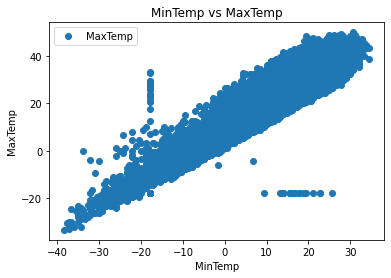

In [ ]:
#To plot Mintemp vs MaxTemp which displays custer of points
dataset.plot(x='MinTemp', y='MaxTemp', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

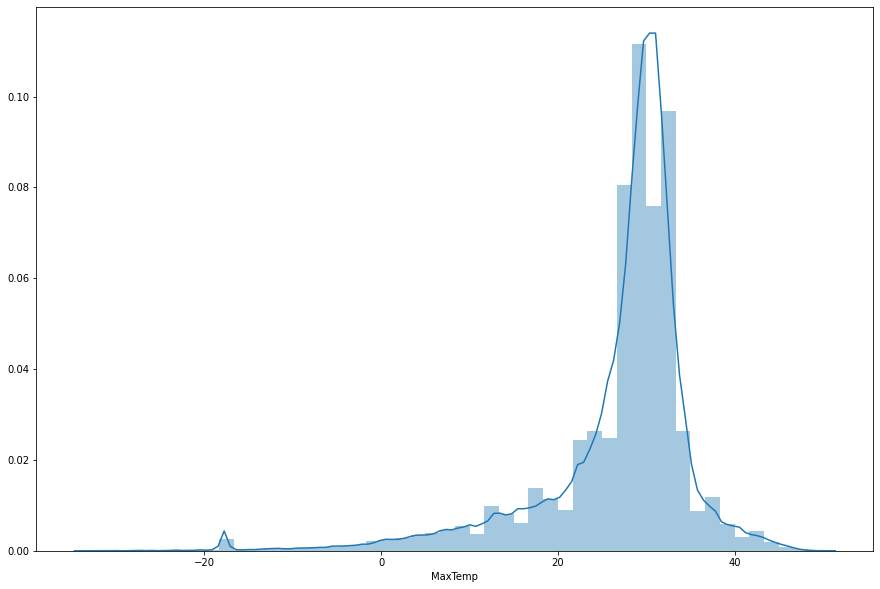

In [ ]:
#Gives graphical layout which shows peaks and helps in identifying where the MaxTemp lies(Between which boundaries)
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['MaxTemp'])

In [ ]:
#Splitting data into different variables to perform predictions
X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)

In [ ]:
#Splitting the data into Training Set and Testing set
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2,train_size=0.8,random_state=0)

In [ ]:
#Inducing a Linear Regression model to perform our predictions and fitting the training data into our model
regressor=LinearRegression()
regressor.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Printing the Intercept and the slope of the equation y=mx+c
print(regressor.intercept_)
print(regressor.coef_)

[10.66185201]
[[0.92033997]]


This means that for every one unit change in the Minimum Temperature, the Maximum Temperature increases by 0.92%

**Making Predictions**

In [ ]:
#Making predictions using the test data
prediction=regressor.predict(test_X)

In [ ]:
#Comparing the actual values to that predicted by the algorithm
df=pd.DataFrame({'Actual values': test_y.flatten(), 'Predicted Values': prediction.flatten()})
df


,Actual values,Predicted Values
0,28.888889,33.670351
1,31.111111,30.091251
2,27.222222,26.512151
3,28.888889,31.113851
4,23.333333,15.774852
...,...,...
23803,32.777778,32.136451
23804,32.222222,29.068651
23805,31.111111,32.647751
23806,31.111111,30.602551


**To check if the algorithm designed works**

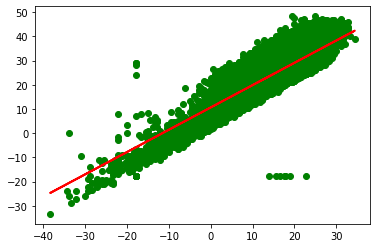

In [ ]:
#Plotting our predictions as a straight line with the plot we observed before
plt.scatter(test_X, test_y,  color='green')
plt.plot(test_X, prediction, color='red', linewidth=2)
plt.show()

**Validation of model with MAE, MSE, RMSE**

*   MAE: Mean Absolute Error
*   MSE: Mean Squared Error
*   RMSE: Root Mean Squared Error





In [ ]:
#Mean Absolute Error is given by
print('MAE:', (metrics.mean_absolute_error(prediction,test_y)))
#Mean Squared Error is given by
print('MSE:', metrics.mean_squared_error(prediction,test_y))
#Root Mean Squared Error is given by
print('RMSE:', np.sqrt(metrics.mean_squared_error(prediction,test_y)))

MAE: 3.1993843178317336
MSE: 17.611507940032364
RMSE: 4.196606717341091
